<a href="https://colab.research.google.com/github/vibhugulati/Practice/blob/master/case_study_citibank_defaulter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [0]:
test=pd.read_csv('test.csv')
train=pd.read_csv('train_1.csv')

In [0]:
train.head()

,Ref.No,X1,X2,X3,X4,X5,X6,X7,Y
0,22203,320000,2,1,2,27,1,2,1
1,1288,470000,1,2,1,41,-2,-2,0
2,11822,20000,1,2,2,25,1,2,0
3,15085,80000,1,3,1,41,0,0,1
4,6192,30000,1,1,2,30,1,-2,1


In [0]:
train.isnull().sum()

Ref.No    0
X1        0
X2        0
X3        0
X4        0
X5        0
X6        0
X7        0
Y         0
dtype: int64

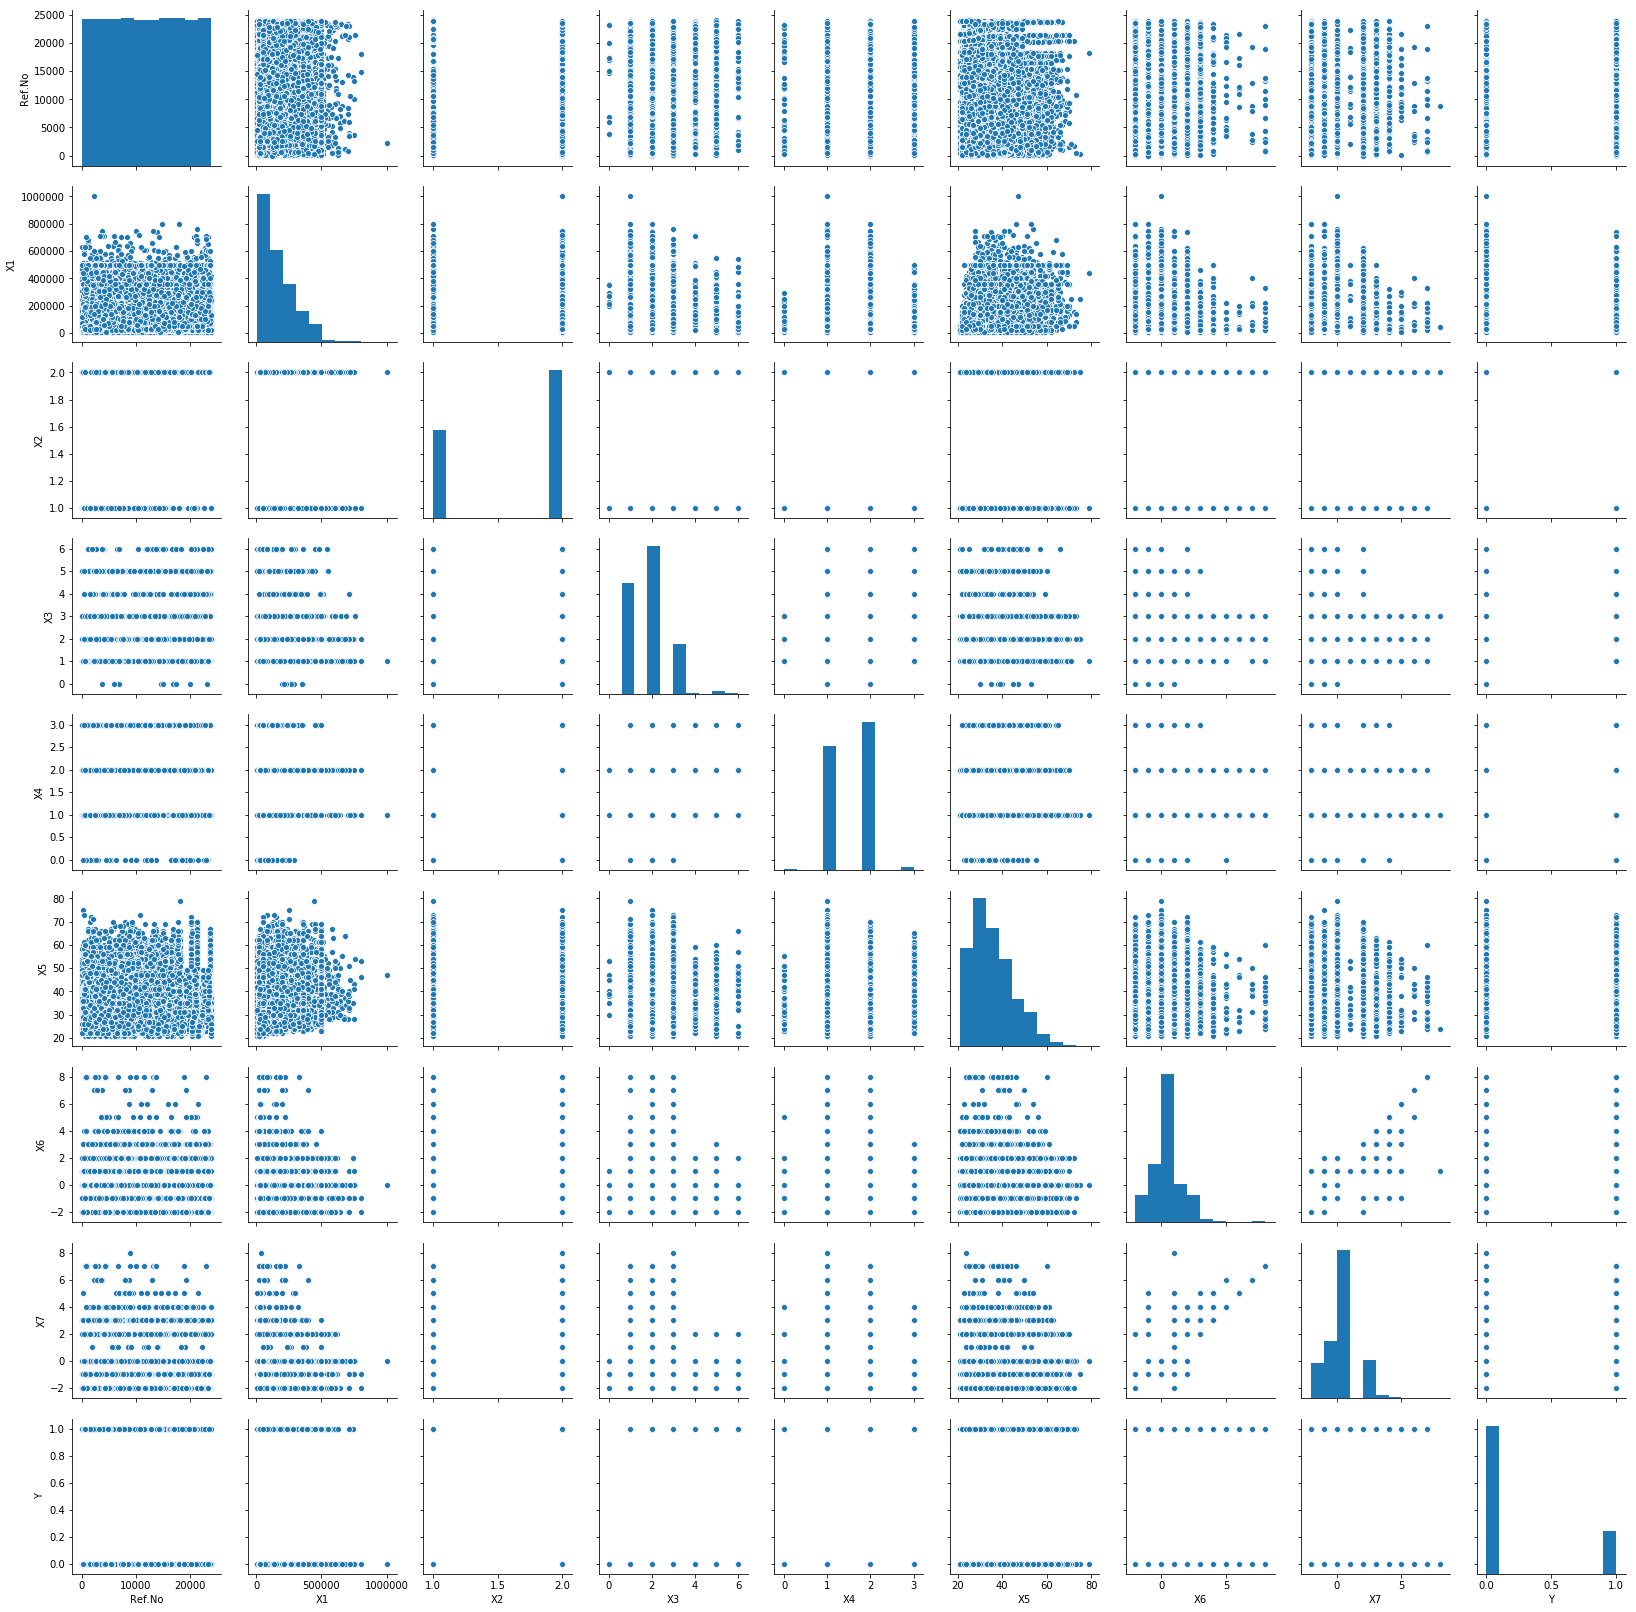

In [0]:
sns.pairplot(train)
plt.show()

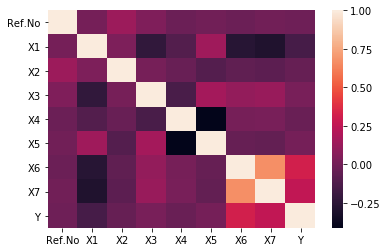

In [0]:
sns.heatmap(train.corr())

In [0]:
train.corr()

,Ref.No,X1,X2,X3,X4,X5,X6,X7,Y
Ref.No,1.000000,0.007724,0.134764,0.042418,-0.021744,0.000619,-0.021927,-0.001488,-0.013180
X1,0.007724,1.000000,0.034904,-0.227472,-0.105628,0.149632,-0.266460,-0.294104,-0.150885
X2,0.134764,0.034904,1.000000,0.016744,-0.036408,-0.098736,-0.061844,-0.071631,-0.038559
X3,0.042418,-0.227472,0.016744,1.000000,-0.139503,0.166523,0.108855,0.126305,0.023008
X4,-0.021744,-0.105628,-0.036408,-0.139503,1.000000,-0.412459,0.013404,0.020276,-0.031020
X5,0.000619,0.149632,-0.098736,0.166523,-0.412459,1.000000,-0.037337,-0.053494,0.008051
X6,-0.021927,-0.266460,-0.061844,0.108855,0.013404,-0.037337,1.000000,0.669413,0.319002
X7,-0.001488,-0.294104,-0.071631,0.126305,0.020276,-0.053494,0.669413,1.000000,0.258833
Y,-0.013180,-0.150885,-0.038559,0.023008,-0.031020,0.008051,0.319002,0.258833,1.000000


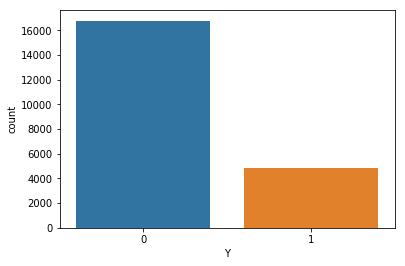

In [0]:
sns.countplot(train.Y)

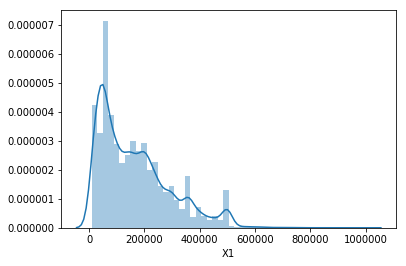

In [0]:
sns.distplot(train.X1)

In [0]:
train.describe()

,Ref.No,X1,X2,X3,X4,X5,X6,X7,Y
count,21600.000000,21600.000000,21600.000000,21600.000000,21600.000000,21600.000000,21600.000000,21600.000000,21600.000000
mean,12000.773750,165235.818519,1.626991,1.845926,1.558704,35.382361,-0.002917,-0.124028,0.223796
std,6931.541584,129013.755215,0.483616,0.781139,0.522008,9.266769,1.126164,1.201892,0.416797
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,0.000000
25%,6008.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,0.000000
50%,12001.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000
75%,17995.250000,230000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000
max,24000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,1.000000


In [0]:
gender=pd.get_dummies(train['X2'],prefix='gender',columns='gender')
education=pd.get_dummies(train['X3'],prefix='education',columns='education')
marital_status=pd.get_dummies(train['X4'],prefix='marital_status',columns='marital_status')

In [0]:
train1=pd.concat([train,gender,education,marital_status],axis=1)

In [0]:
train1.isnull().sum()

Ref.No              0
X1                  0
X2                  0
X3                  0
X4                  0
X5                  0
X6                  0
X7                  0
Y                   0
gender_1            0
gender_2            0
education_0         0
education_1         0
education_2         0
education_3         0
education_4         0
education_5         0
education_6         0
marital_status_0    0
marital_status_1    0
marital_status_2    0
marital_status_3    0
dtype: int64

In [0]:
train1=train1.drop(['X2','X3','X4'],axis=1)


In [0]:
train1.head()

,Ref.No,X1,X5,X6,X7,Y,gender_1,gender_2,education_0,education_1,education_2,education_3,education_4,education_5,education_6,marital_status_0,marital_status_1,marital_status_2,marital_status_3
0,22203,320000,27,1,2,1,0,1,0,1,0,0,0,0,0,0,0,1,0
1,1288,470000,41,-2,-2,0,1,0,0,0,1,0,0,0,0,0,1,0,0
2,11822,20000,25,1,2,0,1,0,0,0,1,0,0,0,0,0,0,1,0
3,15085,80000,41,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0
4,6192,30000,30,1,-2,1,1,0,0,1,0,0,0,0,0,0,0,1,0


In [0]:
train1.shape

(21600, 19)

In [0]:
x=train1.drop(['Ref.No','Y'],axis=1)
y=train1['Y']

In [0]:
from sklearn.cluster import KMeans
k=KMeans(n_clusters=2)
labels=k.fit(x,y).predict(x,y)

In [0]:
labels=pd.DataFrame(labels,columns=['Labels'])

In [0]:
x=pd.concat([x,labels],axis=1)

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=567)
sc=StandardScaler()
scalertrain=sc.fit_transform(xtrain)
scalertest=sc.transform(xtest)

In [0]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
lg.fit(scalertrain,ytrain)
lg.score(scalertest,ytest)

0.808179012345679

In [0]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion='entropy',random_state=356,max_depth=2)
dt.fit(scalertrain,ytrain)
dt.score(scalertest,ytest)

0.8202160493827161

In [0]:
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier,AdaBoostClassifier,VotingClassifier

In [0]:
bc=BaggingClassifier()
bc.fit(scalertrain,ytrain)
bc.score(scalertest,ytest)

0.7723765432098766

In [0]:
rf=RandomForestClassifier()
rf.fit(scalertrain,ytrain)
rf.score(scalertest,ytest)

0.7728395061728395

In [0]:
ada=AdaBoostClassifier()
ada.fit(scalertrain,ytrain)
ada.score(scalertest,ytest)

0.8175925925925925

In [0]:
vote=VotingClassifier(estimators=[('logistic_regression',lg),('decisiontree',dt),('bagging',bc),('random_forest',rf),('adaboost',ada)])
vote.fit(scalertrain,ytrain)
vote.score(scalertest,ytest)

0.8177469135802469

In [0]:
test.head()

,Ref.No,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,17083,50000,2,1,2,25,0,0,0,0,...,38008,31898,20154,2000,5040,8034,3029,5000,49436,NaN
1,3494,120000,2,2,2,24,0,0,0,0,...,6761,7189,1087,1400,1000,0,1000,1087,801,NaN
2,21945,120000,2,2,2,27,1,-2,-1,-1,...,0,0,0,0,2382,0,0,0,0,NaN
3,3499,60000,1,1,2,28,0,-1,0,0,...,9900,310,160,6000,10000,900,310,0,3400,NaN
4,18973,100000,2,1,2,28,3,2,0,0,...,53407,51951,53195,0,1831,4339,0,2083,1939,NaN


In [0]:
test1=test[['X1','X2','X3','X4','X5','X6','X7']]

In [0]:
gender=pd.get_dummies(test1['X2'],prefix='gender',columns='gender')
education=pd.get_dummies(test1['X3'],prefix='education',columns='education')
marital_status=pd.get_dummies(test1['X4'],prefix='marital_status',columns='marital_status')


In [0]:
test2=pd.concat([test1,gender,education,marital_status],axis=1)

In [0]:
test2.head()

,X1,X2,X3,X4,X5,X6,X7,gender_1,gender_2,education_0,education_1,education_2,education_3,education_4,education_5,education_6,marital_status_0,marital_status_1,marital_status_2,marital_status_3
0,50000,2,1,2,25,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0
1,120000,2,2,2,24,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
2,120000,2,2,2,27,1,-2,0,1,0,0,1,0,0,0,0,0,0,1,0
3,60000,1,1,2,28,0,-1,1,0,0,1,0,0,0,0,0,0,0,1,0
4,100000,2,1,2,28,3,2,0,1,0,1,0,0,0,0,0,0,0,1,0


In [0]:
test3=test2.drop(['X2','X3','X4'],axis=1)


In [0]:
test3.isnull().sum()

X1                  0
X5                  0
X6                  0
X7                  0
gender_1            0
gender_2            0
education_0         0
education_1         0
education_2         0
education_3         0
education_4         0
education_5         0
education_6         0
marital_status_0    0
marital_status_1    0
marital_status_2    0
marital_status_3    0
dtype: int64

In [0]:
test3.shape

(2399, 17)

In [0]:
labels_test=k.predict(test3)
labels_test=pd.DataFrame(labels_test,columns=['Labels'])
test3=pd.concat([test3,labels_test],axis=1)

In [0]:
scaled_test1=pd.DataFrame(sc.transform(test3),columns=test3.columns)

In [0]:
pred_v=vote.predict(scaled_test1)
solution=pd.DataFrame({'Ref.No':np.arange(1,2400),'Y':pred_v})
solution.to_csv("solution vibhu gulati.csv", index=False)